## Usage of one explainer

Take MTER as an example, and use dataset amazon_toy.

In [1]:
from cornac.datasets import amazon_toy
from cornac.data.reader import Reader
from cornac.eval_methods import StratifiedSplit
from cornac.data.sentiment import SentimentModality
from cornac.models import MTER
from cornac.explainer import Exp_MTER

# Load the Amazon toy dataset
rating = amazon_toy.load_feedback(fmt="UIRT", reader=Reader(min_user_freq=50))
sentiment_data = amazon_toy.load_sentiment(reader=Reader(min_user_freq=50))

md = SentimentModality(data=sentiment_data)

eval_method = StratifiedSplit(
    data=rating,
    group_by="user",
    chrono=True,
    sentiment=md,
    test_size=0.2,
    exclude_unknowns=True,
    verbose=True,
)

# Instantiate the MTER model
mter = MTER(
    max_iter=20,
    n_user_factors=8,
    n_item_factors=8,
    n_aspect_factors=8,
    n_opinion_factors=8,
    n_bpr_samples=1000,
    n_element_samples=50,
    lambda_reg=0.1,
    lambda_bpr=10,
    lr=0.5,
)

mter.fit(eval_method.train_set)

# Instantiate the explainer
explainer = Exp_MTER(mter, eval_method.train_set)


/home/linan/miniconda3/envs/cornac/lib/python3.11/site-packages/tensorflow/python/debug/cli/debugger_cli_common.py:19: DeprecationWarning: module 'sre_constants' is deprecated
  import sre_constants


rating_threshold = 1.0
exclude_unknowns = True
---
Training data:
Number of users = 119
Number of items = 4058
Number of ratings = 7197
Max rating = 5.0
Min rating = 1.0
Global mean = 4.3
---
Test data:
Number of users = 119
Number of items = 4058
Number of ratings = 741
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 119
Total items = 4058


### Explain recommendations

In [2]:
# first, we need some recommendations
some_users = eval_method.test_set.user_ids[:3]
recomedations = mter.recommend_to_multiple_users(some_users, k=5)
print(recomedations)

           user_id     item_id  prediction
0   A30H2335OM7RD6  B00804BDEU    2.040724
1   A30H2335OM7RD6  B004P90PIO    1.952247
2   A30H2335OM7RD6  B00AHAJBQM    1.950570
3   A30H2335OM7RD6  B00BRCN9TO    1.933212
4   A30H2335OM7RD6  B004I8V6ZS    1.848171
5   A3R01WHD75L6FG  B00804BDEU    0.633543
6   A3R01WHD75L6FG  B00BRCN9TO    0.603503
7   A3R01WHD75L6FG  B004P90PIO    0.599226
8   A3R01WHD75L6FG  B00AHAJBQM    0.588474
9   A3R01WHD75L6FG  B004I8V6ZS    0.568956
10  A19FRW264WZTGP  B00804BDEU    0.961170
11  A19FRW264WZTGP  B00BRCN9TO    0.919368
12  A19FRW264WZTGP  B004P90PIO    0.906003
13  A19FRW264WZTGP  B00AHAJBQM    0.888399
14  A19FRW264WZTGP  B004I8V6ZS    0.863712


In [3]:
explainer.explain_recommendations(recomedations)

Computing explanations:   0%|          | 0/15 [00:00<?, ?it/s]

,user_id,item_id,prediction,explanations
0,A30H2335OM7RD6,B00804BDEU,2.040724,"{'price': {'difficult': 1.9153996, 'solid': 0...."
1,A30H2335OM7RD6,B004P90PIO,1.952247,"{'overall': {'popular': 0.69657284, 'falls': 0..."
2,A30H2335OM7RD6,B00AHAJBQM,1.950570,"{'overall': {'stuck': 1.1971427, 'lost': 0.764..."
3,A30H2335OM7RD6,B00BRCN9TO,1.933212,"{'overall': {'difficult': 1.3536121, 'improved..."
4,A30H2335OM7RD6,B004I8V6ZS,1.848171,"{'overall': {'recommended': 0.99166405, 'twist..."
5,A3R01WHD75L6FG,B00804BDEU,0.633543,"{'price': {'difficult': 0.71889496, 'solid': 0..."
6,A3R01WHD75L6FG,B00BRCN9TO,0.603503,"{'overall': {'difficult': 0.5175914, 'improved..."
7,A3R01WHD75L6FG,B004P90PIO,0.599226,"{'fit': {'popular': 0.26829207, 'falls': 0.217..."
8,A3R01WHD75L6FG,B00AHAJBQM,0.588474,"{'price': {'stuck': 0.5636472, 'lost': 0.37269..."
9,A3R01WHD75L6FG,B004I8V6ZS,0.568956,"{'overall': {'recommended': 0.37537, 'twist': ..."


### Explain one user-item pair

In [4]:
one_user = eval_method.train_set.user_ids[0]
one_item = eval_method.train_set.item_ids[0]
explanation = explainer.explain_one_recommendation_to_user(one_user, one_item)
print(f"For User {one_user} and Item {one_item}:")
print("Explanation:")
print(explanation)

For User A30H2335OM7RD6 and Item B00000IZQE:
Explanation:
{'children': {'negatives': 0.27673334, 'versatile': 0.19414704, 'good': 0.017498462}, 'toy': {'negatives': 0.4804516, 'versatile': 0.36138353, 'loves': 0.030754115}, 'also': {'negatives': 0.37475088, 'versatile': 0.2498297, 'good': 0.028994646}}


### Explain one user-item with ref-item

In [5]:
one_user = eval_method.train_set.user_ids[0]
one_item = eval_method.train_set.item_ids[0]
ref_item = eval_method.train_set.item_ids[10]
explanation = explainer.explain_one_with_ref(user_id=one_user, item_id=one_item, ref_item_id=ref_item)
explanation

,user_id,item_id,explanation,ref_item_id,ref_explanation
0,A30H2335OM7RD6,B00000IZQE,"{'children': {'negatives': 0.27673334, 'versat...",1581170769,"{'colors': {'cute': 0.018207455, 'nice': 0.006..."


In [6]:
# explanation for user-item
print(explanation['explanation'])
# and explanation for user-ref_item
print(explanation['ref_explanation'])

0    {'children': {'negatives': 0.27673334, 'versat...
Name: explanation, dtype: object
0    {'colors': {'cute': 0.018207455, 'nice': 0.006...
Name: ref_explanation, dtype: object


### Generate plot for Exp_MTER

In [7]:
users = eval_method.test_set.user_ids
recommendations = mter.recommend_to_multiple_users(users, k=10)
explanations = explainer.explain_recommendations(recommendations, feature_k=6)
explanations_df = explanations.copy()

Computing explanations:   0%|          | 0/1190 [00:00<?, ?it/s]

/home/linan/miniconda3/envs/cornac/lib/python3.11/site-packages/cornac-2.0.0-py3.11-linux-x86_64.egg/cornac/visualization/visualization.py:318: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axe.set_xticklabels(x, rotation=45)


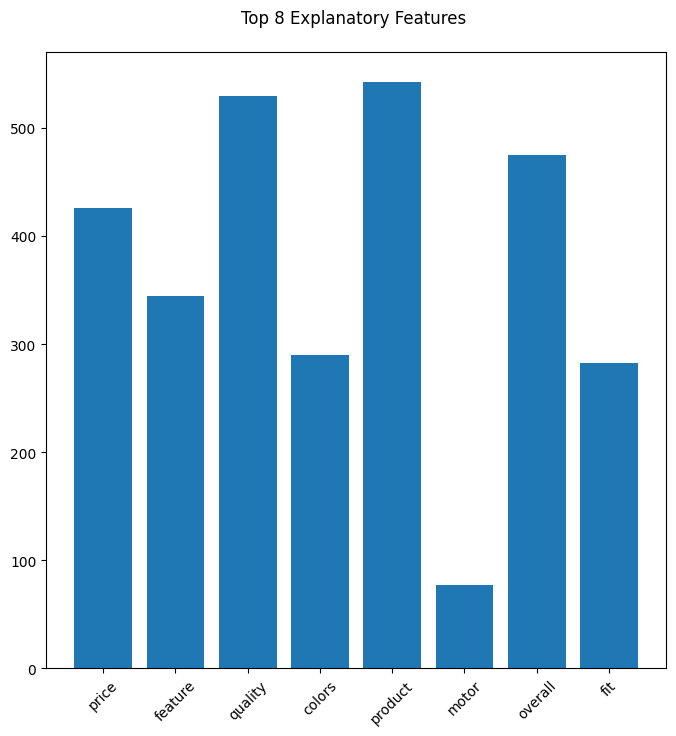

In [9]:
from cornac.visualization import Visualization
my_plots = Visualization()

# Create a plot for a specific user and item
one_user = eval_method.train_set.user_ids[0]
one_item = eval_method.train_set.item_ids[0]
ind_df = my_plots.create_individual_feature_importance_plot(
    explanations,
    user_id=one_user,
    item_id=one_item,
    type="bar",
    top_k=6,
    save_plot=False,
)

filtered_df = my_plots.create_aggregate_feature_importance_plot(
    explanations, type="bar", top_k=8, save_plot=False
)